In [6]:
import sys
import data_loading
import data_understanding
import data_model
import model_training
import model_testing
import data_ingestion
import metrics

In [ ]:
import importlib
importlib.reload(data_loading)
importlib.reload(data_understanding)
importlib.reload(data_model)
importlib.reload(model_training)
importlib.reload(model_testing)
importlib.reload(data_ingestion)
importlib.reload(metrics)

<module 'metrics' from 'c:\\Users\\admin\\Desktop\\ConvNILM-master\\ConvNILM-master\\metrics.py'>

## Data Loading

In [8]:
dishwasher_power = data_loading.read_csv_data("data/dishwasher_train.csv")
fridge_power = data_loading.read_csv_data('data/fridge_train.csv')
main_power = data_loading.read_csv_data('data/main_train.csv')

## Fridge's Consumption inference

Let's train the model for fridge with early stopping enabled.



Data Loading...Done.
Data splitting...Done.
Statistics of interest:
Overall min power: 73.48100000000002, Overall max power: 6048.699999999999
Overall mean power: 378.86418803376546, Overall std power: 554.737811968085
Min fridge power: 2.2, Max fridge power: 1233.1
Mean fridge power: 36.849723209522324, Std fridge power: 47.77702094128719
Zero padding...Done.
Rescaling...Done.
Preparing data ingestion...Done.
Building model...Done.
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model training...
Epoch 1/50


c:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9534/9534 ━━━━━━━━━━━━━━━━━━━━ 692s 72ms/step - energy_based_f1: 230.9455 - loss: 0.5935 - val_energy_based_f1: 355.9161 - val_loss: 0.4660
Epoch 2/50
9534/9534 ━━━━━━━━━━━━━━━━━━━━ 697s 73ms/step - energy_based_f1: 228.8876 - loss: 0.4650 - val_energy_based_f1: 357.9922 - val_loss: 0.4546
Epoch 3/50
9534/9534 ━━━━━━━━━━━━━━━━━━━━ 697s 73ms/step - energy_based_f1: 227.8874 - loss: 0.4445 - val_energy_based_f1: 358.2379 - val_loss: 0.4761
Epoch 4/50
9534/9534 ━━━━━━━━━━━━━━━━━━━━ 983s 103ms/step - energy_based_f1: 226.4931 - loss: 0.4305 - val_energy_based_f1: 361.2357 - val_loss: 0.4493
Epoch 5/50
9534/9534 ━━━━━━━━━━━━━━━━━━━━ 816s 86ms/step - energy_based_f1: 225.5945 - loss: 0.4199 - val_energy_based_f1: 358.2403 - val_loss: 0.4405
Epoch 6/50
9534/9534 ━━━━━━━━━━━━━━━━━━━━ 697s 73ms/step - energy_based_f1: 224.5473 - loss: 0.4105 - val_energy_based_f1: 359.3270 - val_loss: 0.4614
Epoch 7/50
9534/9534 ━━━━━━━━━━━━━━━━━━━━ 697s 73ms/step - energy_based_f1: 223.9735 - loss: 0.4037 - va

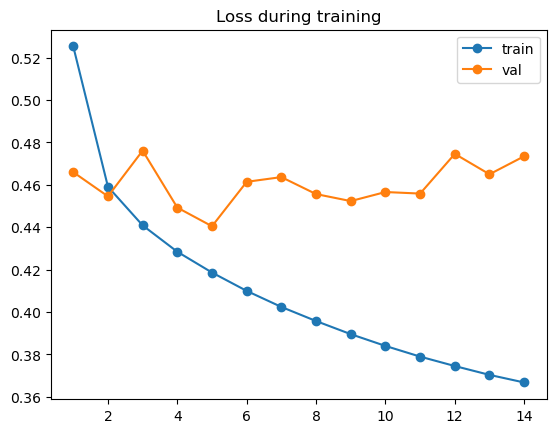

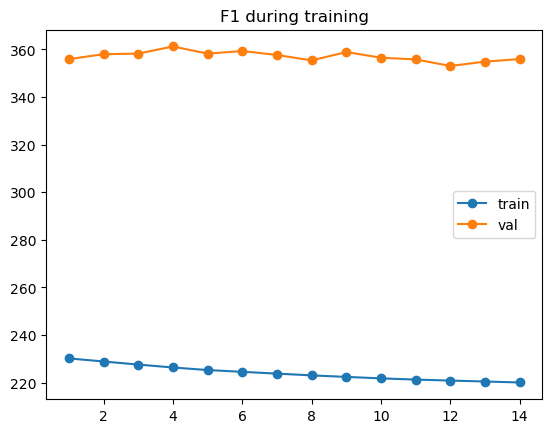

<Sequential name=sequential_1, built=True>

In [9]:
model_training.train_model(appliance_name='fridge', 
                           main_path='data/main_train.csv',
                           appliance_path='data/fridge_train.csv',
                           train_end_timestamp='2019-03-01 00:00:00',
                           window_size=600,
                           batch_size=512,
                           build_model_func=data_model.build_fridge_cnn,
                           epochs=50,
                           patience=10,
                           early_stopping=True,
                           rescaling='standardize',
                           split=True,
                           plot_model=True)

Now we train the model for a fixed number of epochs.

Data Loading...Done.
Statistics of interest:
Overall min power: 73.48100000000002, Overall max power: 6048.699999999999
Overall mean power: 370.91555422946004, Overall std power: 549.1880538356259
Min fridge power: 2.2, Max fridge power: 1233.1
Mean fridge power: 37.23710644724372, Std fridge power: 46.9886959530205
Zero padding...Done.
Rescaling...Done.
Preparing data ingestion...Done.
Building model...Done.
Model training...
Epoch 1/7


c:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11880/11880 ━━━━━━━━━━━━━━━━━━━━ 1477s 124ms/step - loss: 0.5651
Epoch 2/7
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 1467s 124ms/step - loss: 0.4604
Epoch 3/7
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 1471s 124ms/step - loss: 0.4419
Epoch 4/7
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 1476s 124ms/step - loss: 0.4313
Epoch 5/7
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 1481s 125ms/step - loss: 0.4238
Epoch 6/7
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 1492s 126ms/step - loss: 0.4157
Epoch 7/7
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 918s 77ms/step - loss: 0.4107
Training completed.


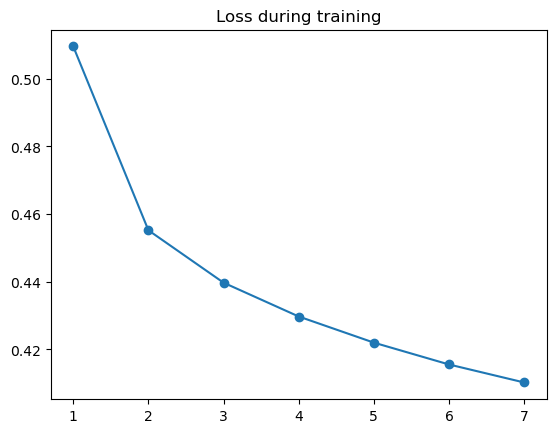

In [11]:
model = model_training.train_model(appliance_name='fridge',
                                   main_path='data/main_train.csv',
                                   appliance_path='data/fridge_train.csv',
                                   window_size=600,
                                   batch_size=512,
                                   build_model_func=data_model.build_fridge_cnn,
                                   epochs=7,
                                   rescaling='standardize')

The model is saved for future reuse.

In [13]:
model.save('fridge_model.keras')

In [15]:
ground_truth, predicted_values = model_testing.test_model(appliance_name='fridge',
                                                          main_path='data/main_train.csv',
                                                          appliance_path='data/fridge_train.csv',
                                                          model_path='fridge_model.keras',
                                                          window_size=600,
                                                          batch_size=512,
                                                          rescaling='standardize',
                                                          appliance_mean_power=37.23710644724372,
                                                          appliance_std_power=46.9886959530205,
                                                          main_mean_power=370.91555422946004,
                                                          main_std_power=549.1880538356259)

Data Loading...Done.
Zero padding...Done.
Rescaling...Done.
Preparing data ingestion...Done.
    8/11880 ━━━━━━━━━━━━━━━━━━━━ 3:35 18ms/step

c:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11880/11880 ━━━━━━━━━━━━━━━━━━━━ 220s 19ms/step
Done.


In [16]:
f1 = metrics.compute_F1_score(predicted_values, ground_truth)
print('Energy based F1 score on test set: {}'.format(f1))

Energy based F1 score on test set: [0.7549759]
